<a href="https://colab.research.google.com/github/sharna33/CSE_3210_DSP/blob/main/2003009_CSE3210_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🆔 2003009**   



# ✅ **Import Libraries**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **💭Question 1: Basic Z-Transform and ROC**
You are given the discrete-time signal:
$$x[n] = 3^nu[n]$$
1. Find the Z-Transform of the signal x[n].
2. Determine the Region of Convergence (ROC) for this Z-Transform.

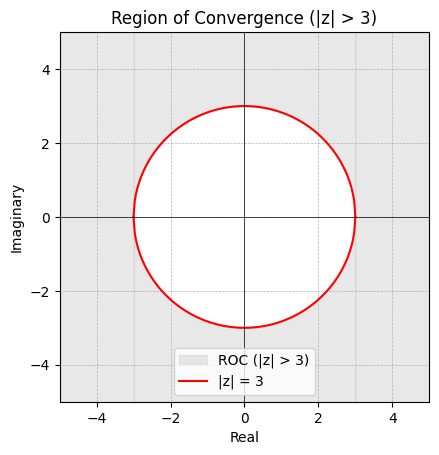

Z-Transformation values...
Z[0]: (5380840+0j)
Z[1]: (3333246.7489003004+3954661.9176228098j)
Z[2]: (-524960.0000000021+4724640j)
Z[3]: (-3346366.7489003+2891941.9176228098j)
Z[4]: (-4304672-3.742909076159001e-09j)
Z[5]: (-3346366.748900296-2891941.9176228154j)
Z[6]: (-524960.0000000024-4724640.000000001j)
Z[7]: (3333246.748900315-3954661.917622795j)
ROC: |z| > 3


In [ ]:
def Z_Transformation(n):
    N = len(n)
    Z = np.zeros(N, dtype=complex)
    signal = np.zeros(N)

    for i in range(N):
      signal[i] = 3**n[i]
    for k in range(N):
      Z[k]= np.sum(signal * (3**n) * np.exp(-1j * 2 * np.pi * n * k/N))

    roc = 'ROC: |z| > 3'
    return Z, roc

n = np.arange(0, 8)

Z, roc = Z_Transformation(n)

fig, ax = plt.subplots()

radius = 3

x = np.linspace(-5, 5, 400)

# Plotting the circle :
# Right side
x_right = np.linspace(radius, 5, 100)
ax.fill_between(x_right, -5, 5, color='lightgray', alpha=0.5, label="ROC (|z| > 3)")

# Left side
x_left = np.linspace(-5, -radius, 100)
ax.fill_between(x_left, -5, 5, color='lightgray', alpha=0.5)

# Top and bottom parts between -radius and radius
x_middle = np.linspace(-radius, radius, 200)
y_circle = np.sqrt(radius**2 - x_middle**2)
ax.fill_between(x_middle, y_circle, 5, color='lightgray', alpha=0.5)
ax.fill_between(x_middle, -y_circle, -5, color='lightgray', alpha=0.5)

# Plot the circle boundary
x_circle = np.linspace(-radius, radius, 200)
y_circle_upper = np.sqrt(radius**2 - x_circle**2)
y_circle_lower = -np.sqrt(radius**2 - x_circle**2)
ax.plot(x_circle, y_circle_upper, 'r', linewidth=1.5, label='|z| = 3')
ax.plot(x_circle, y_circle_lower, 'r', linewidth=1.5)
ax.set_aspect(1)

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Region of Convergence (|z| > 3)")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

print('Z-Transformation values...')
for i, z in enumerate(Z):
    print(f'Z[{i}]: {z}')

print(roc)


# **💭Question 2: Z-Transform of a Sum of Signals**
Consider the following signal:

$$x[n] = 2^nu[n] + 3^nu[n]$$  
Where u[n] is the unit step function.
1. Find the Z-Transform of the signal x[n].
2. Find the ROC of the system.

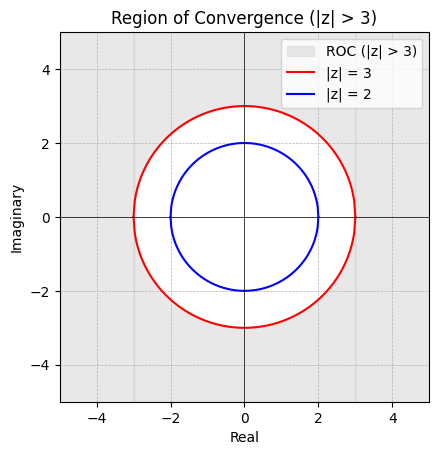

Z-Transformation values...
Z[0]: (3535+0j)
Z[1]: (1326.28463018496+2583.1222920256964j)
Z[2]: (-707.0000000000009+2069.9999999999995j)
Z[3]: (-1516.28463018496+1023.1222920256967j)
Z[4]: (-1725-1.5330128631726566e-12j)
Z[5]: (-1516.2846301849595-1023.1222920256993j)
Z[6]: (-707.0000000000018-2070.000000000001j)
Z[7]: (1326.2846301849672-2583.1222920256896j)
ROC: |z| > 3


In [ ]:
def Z_Transformation(n):
    N = len(n)
    Z = np.zeros(N, dtype=complex)
    signal_2n = np.zeros(N)
    signal_3n = np.zeros(N)

    for i in range(N):
          signal_2n[i] = 2.0**n[i]    # Calculate 2^n
          signal_3n[i] = 3.0**n[i]    # Calculate 3^n

    # Combined signal x[n] = 3^n*u[n] + 2^n*u[n]
    total_signal = signal_3n + signal_2n

    for k in range(N):
        Z[k] = np.sum(total_signal * np.exp(-1j * 2 * np.pi * n * k/N))

    return Z, 'ROC: |z| > 3'       # For 2^n, ROC: |Z|>2 and for 3^n, ROC: |Z|>3. So, common ROC: |Z| > 3.

n = np.arange(0, 8)

Z, roc = Z_Transformation(n)

fig, ax = plt.subplots()

# Plotting
circle_out = 3           # Circle radius for |z|=3
circle_in = 2            # Circle radius for |z|=2

# Right side
x_right = np.linspace(circle_out, 5, 100)
ax.fill_between(x_right, -5, 5, color='lightgray', alpha=0.5, label="ROC (|z| > 3)")

# Left side
x_left = np.linspace(-5, -circle_out, 100)
ax.fill_between(x_left, -5, 5, color='lightgray', alpha=0.5)

# Top and bottom parts between -radius and radius
x_middle = np.linspace(-circle_out, circle_out, 200)
y_circle = np.sqrt(circle_out**2 - x_middle**2)
ax.fill_between(x_middle, y_circle, 5, color='lightgray', alpha=0.5)
ax.fill_between(x_middle, -y_circle, -5, color='lightgray', alpha=0.5)

# Plot the outer circle boundary (|z|=3)
x_circle_outer = np.linspace(-circle_out, circle_out, 200)
y_circle_outer_upper = np.sqrt(circle_out**2 - x_circle_outer**2)
y_circle_outer_lower = -np.sqrt(circle_out**2 - x_circle_outer**2)
ax.plot(x_circle_outer, y_circle_outer_upper, 'r', linewidth=1.5, label='|z| = 3')
ax.plot(x_circle_outer, y_circle_outer_lower, 'r', linewidth=1.5)

# Plot the inner circle boundary (|z|=2)
x_circle_inner = np.linspace(-circle_in, circle_in, 200)
y_circle_inner_upper = np.sqrt(circle_in**2 - x_circle_inner**2)
y_circle_inner_lower = -np.sqrt(circle_in**2 - x_circle_inner**2)
ax.plot(x_circle_inner, y_circle_inner_upper, 'b-', linewidth=1.5, label='|z| = 2')
ax.plot(x_circle_inner, y_circle_inner_lower, 'b-', linewidth=1.5)
ax.set_aspect(1)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Region of Convergence (|z| > 3)")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

print('Z-Transformation values...')
for i, z in enumerate(Z):
    print(f'Z[{i}]: {z}')

print(roc)

# **💭Question 3: Z-Transform of an Exponential De-cay Signal**
Given the discrete-time signal:
$$x[n] = e^{−0.2n}u[n]$$
1. Find the Z-Transform of the signal x[n].
2. Determine the ROC for this signal.
3. Use Python to plot the magnitude and phase of the Z-Transform for z
values on a circle of radius 1.

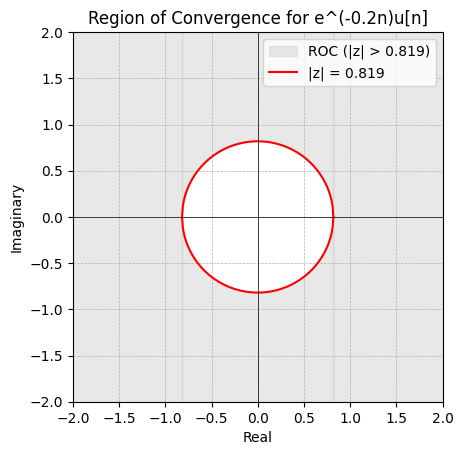

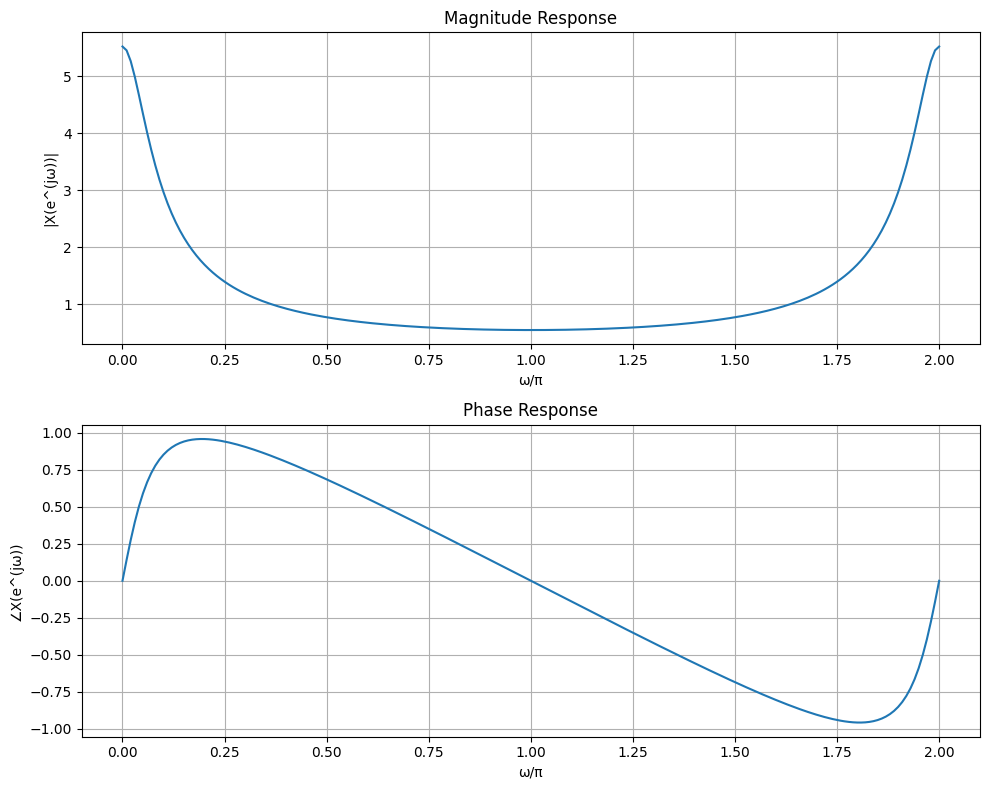


Z-Transformation values...
Z[0]: (4.40286201635012+0j)
Z[1]: (0.6557730117856984-0.901623898132448j)
Z[2]: (0.47781470616938027-0.3912015942137914j)
Z[3]: (0.4455690599798584-0.16337222988557315j)
Z[4]: (0.43882442778000597-1.3295015415749554e-16j)
Z[5]: (0.4455690599798575+0.16337222988557323j)
Z[6]: (0.4778147061693794+0.39120159421379086j)
Z[7]: (0.6557730117856991+0.901623898132448j)
ROC: |z| > e^(-0.2)


In [ ]:
def Z_Transformation(signal, n):
    N = len(signal)
    Z = np.zeros(N, dtype=complex)

    for k in range(N):
        Z[k] = np.sum(signal * np.exp(-1j * 2 * np.pi * np.arange(N) * k / N))

    roc = 'ROC: |z| > e^(-0.2)'
    return Z, roc

n = np.arange(0, 8)
signal = np.exp(-0.2 * n)

Z, roc = Z_Transformation(signal, n)

fig, ax = plt.subplots()

radius = np.exp(-0.2)

x = np.linspace(-2, 2, 400)

# Plotting
# Right side
x_right = np.linspace(radius, 2, 100)
ax.fill_between(x_right, -2, 2, color='lightgray', alpha=0.5, label=f"ROC (|z| > {radius:.3f})")

# Left side
x_left = np.linspace(-2, -radius, 100)
ax.fill_between(x_left, -2, 2, color='lightgray', alpha=0.5)

# Top and bottom parts between -radius and radius
x_middle = np.linspace(-radius, radius, 200)
y_circle = np.sqrt(radius**2 - x_middle**2)
ax.fill_between(x_middle, y_circle, 2, color='lightgray', alpha=0.5)
ax.fill_between(x_middle, -y_circle, -2, color='lightgray', alpha=0.5)

# Plot the circle boundary
x_circle = np.linspace(-radius, radius, 200)
y_circle_upper = np.sqrt(radius**2 - x_circle**2)
y_circle_lower = -np.sqrt(radius**2 - x_circle**2)
ax.plot(x_circle, y_circle_upper, 'r', linewidth=1.5, label=f'|z| = {radius:.3f}')
ax.plot(x_circle, y_circle_lower, 'r', linewidth=1.5)
ax.set_aspect(1)

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Region of Convergence for e^(-0.2n)u[n]")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

# Now plot magnitude and phase for |z| = 1
theta = np.linspace(0, 2*np.pi, 200)
z = np.exp(1j * theta)  # Points on unit circle

# Calculate Z-transform on unit circle
X = 1 / (1 - np.exp(-0.2) * z)

# Create subplots for magnitude and phase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot magnitude response
ax1.plot(theta/np.pi, np.abs(X))
ax1.set_xlabel('ω/π')
ax1.set_ylabel('|X(e^(jω))|')
ax1.set_title('Magnitude Response')
ax1.grid(True)

# Plot phase response
ax2.plot(theta/np.pi, np.angle(X))
ax2.set_xlabel('ω/π')
ax2.set_ylabel('∠X(e^(jω))')
ax2.set_title('Phase Response')
ax2.grid(True)

plt.tight_layout()
plt.show()

print('\nZ-Transformation values...')
for i, z in enumerate(Z):
    print(f'Z[{i}]: {z}')
print(roc)

# **💭Question 4: Z-Transform of a Sinusoidal Signal For the signal:**

$$x[n] = \sin\left(\frac{\pi}{4} n \right) u[n]$$
1. Find the Z-Transform of the signal x[n].
2. Determine the ROC for this signal.
3. Using Python, plot the magnitude and phase of the Z-Transform for z in
the ROC region.

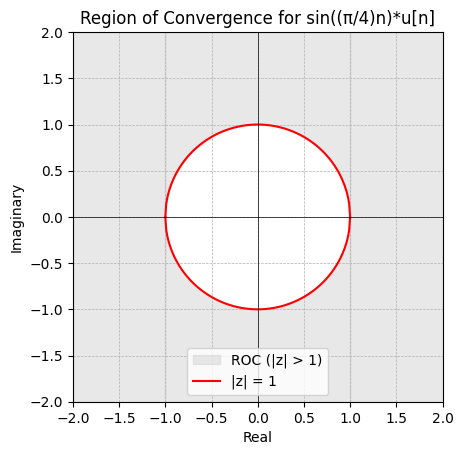

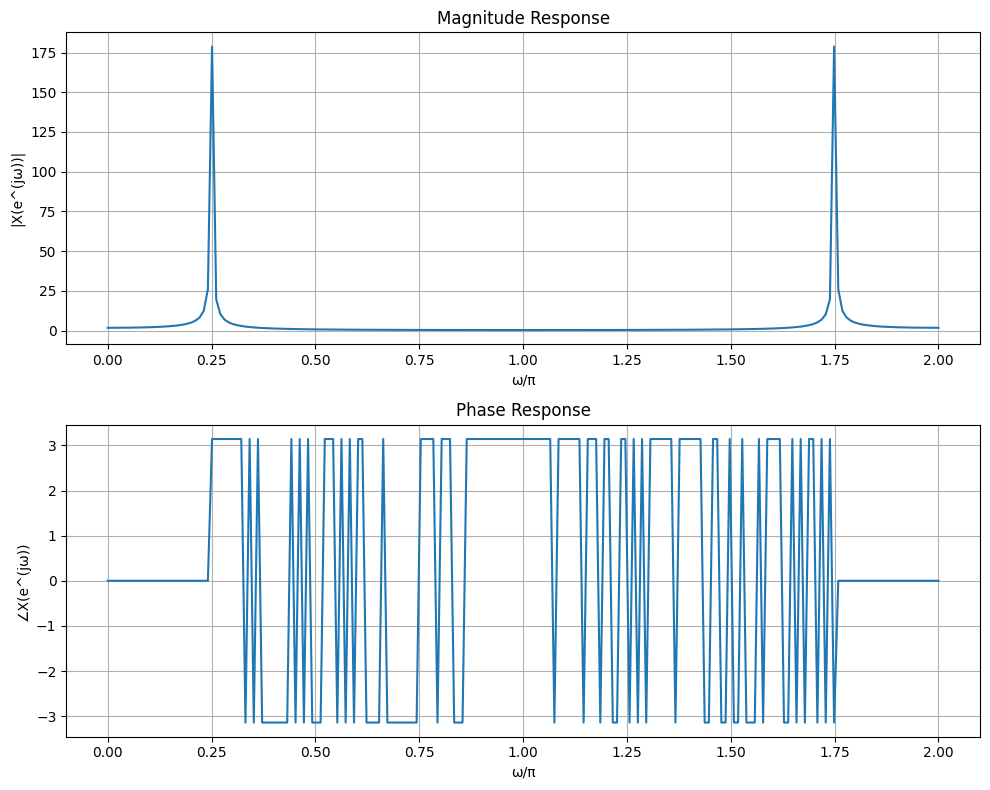

Z-Transformation values...
Z[0]: (1.1442377452219667e-17+0j)
Z[1]: (1.1102230246251565e-16-4j)
Z[2]: (1.224646799147354e-16+1.3390705736695496e-16j)
Z[3]: -6.661338147750939e-16j
Z[4]: (2.33486982377251e-16+2.0290612532945364e-16j)
Z[5]: (1.3322676295501878e-15+1.6653345369377348e-15j)
Z[6]: (2.634612613808775e-15+8.458103819509277e-16j)
Z[7]: (-3.552713678800501e-15+3.999999999999999j)
ROC: |z| > 1


In [ ]:
def Z_Transformation(n):
    N = len(n)
    Z = np.zeros(N, dtype=complex)
    signal = np.zeros(N)

    for i in range(N):
        signal[i] = np.sin((np.pi/4) * n[i])

    for k in range(N):
        Z[k] = np.sum(signal * np.exp(-1j * 2 * np.pi * n * k/N))

    roc = 'ROC: |z| > 1'
    return Z, roc

n = np.arange(0, 8)

Z, roc = Z_Transformation(n)

fig, ax = plt.subplots()

radius = 1

x = np.linspace(-2, 2, 400)

# Plotting
# Right side
x_right = np.linspace(radius, 2, 100)
ax.fill_between(x_right, -2, 2, color='lightgray', alpha=0.5,
                label=f"ROC (|z| > {radius})")

# Left side
x_left = np.linspace(-2, -radius, 100)
ax.fill_between(x_left, -2, 2, color='lightgray', alpha=0.5)

# Top and bottom parts between -radius and radius
x_middle = np.linspace(-radius, radius, 200)
y_circle = np.sqrt(radius**2 - x_middle**2)
ax.fill_between(x_middle, y_circle, 2, color='lightgray', alpha=0.5)
ax.fill_between(x_middle, -y_circle, -2, color='lightgray', alpha=0.5)

# Plot the circle boundary
x_circle = np.linspace(-radius, radius, 200)
y_circle_upper = np.sqrt(radius**2 - x_circle**2)
y_circle_lower = -np.sqrt(radius**2 - x_circle**2)
ax.plot(x_circle, y_circle_upper, 'r', linewidth=1.5, label=f'|z| = {radius}')
ax.plot(x_circle, y_circle_lower, 'r', linewidth=1.5)
ax.set_aspect(1)

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Region of Convergence for sin((π/4)n)*u[n]")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

# Plot magnitude and phase response
theta = np.linspace(0, 2*np.pi, 200)
z = np.exp(1j * theta)

# Calculate Z-transform on unit circle
X = z/(z**2 - 2*z*np.cos(np.pi/4) + 1)

# Create subplots for magnitude and phase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot magnitude response
ax1.plot(theta/np.pi, np.abs(X))
ax1.set_xlabel('ω/π')
ax1.set_ylabel('|X(e^(jω))|')
ax1.set_title('Magnitude Response')
ax1.grid(True)

# Plot phase response
ax2.plot(theta/np.pi, np.angle(X))
ax2.set_xlabel('ω/π')
ax2.set_ylabel('∠X(e^(jω))')
ax2.set_title('Phase Response')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print Z-Transformation values
print('Z-Transformation values...')
for i, z in enumerate(Z):
    print(f'Z[{i}]: {z}')

print(roc)